In [ ]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/ow-hash/portfolio/main/Womens%20Clothing%20E-Commerce%20Reviews.csv?token=GHSAT0AAAAAACQCFGRN3BUQFF4CFGZGJRN6ZQDDNHA'
df = pd.read_csv(url)
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


**No null value.**

**Examine the data first.**

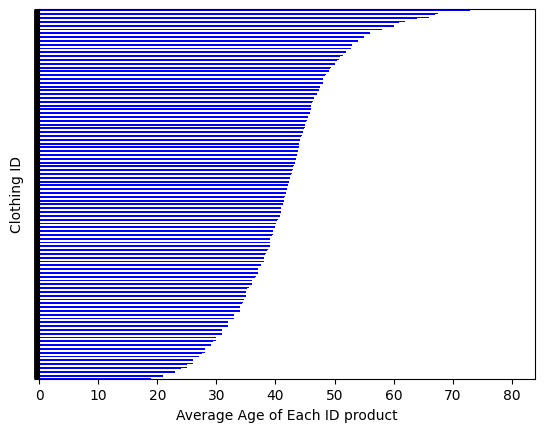

In [ ]:
import matplotlib.pyplot as plt

ax = df.groupby('Clothing ID')['Age'].mean().sort_values().plot(kind='barh', color = 'blue')
ax.set_yticklabels([])
ax.set_xlabel('Average Age of Each ID product')
plt.show()

**Observes that certain products are of interest to younger individuals, while others appeal more to older people.**

**Mean age of all products.**

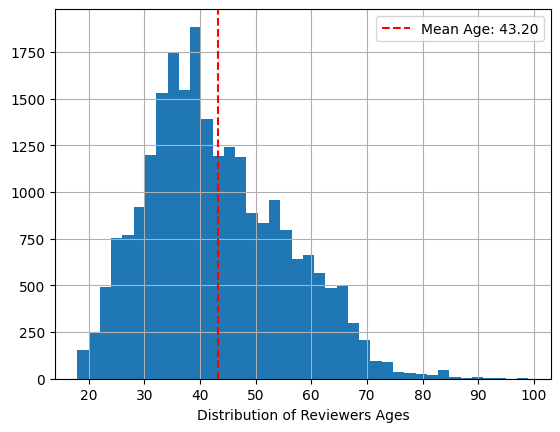

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

mean_age = df['Age'].mean()
ax = df['Age'].hist(bins = 40)
ax.axvline(mean_age, ymin=0, ymax=1, color='r', linestyle='--', label=f'Mean Age: {mean_age:.2f}')

ax.legend()
plt.xlabel('Distribution of Reviewers Ages')
plt.show()

**Try to subgroup by standard deviation.**


**1st group: Less than -1 standard deviation (S.D.).**

**2nd group:  -1 S.D to +1 S.D.**

**3rd group: More than +1 S.D.**

In [ ]:
mean_age = df['Age'].mean()
std_age = df['Age'].std()

def grouping(age):
  if age < (mean_age - std_age):
    return 'group1'
  elif (mean_age - std_age) <= age <= (mean_age + std_age):
    return 'group2'
  else:
    return 'group3'

df['age_group'] = df['Age'].apply(grouping)

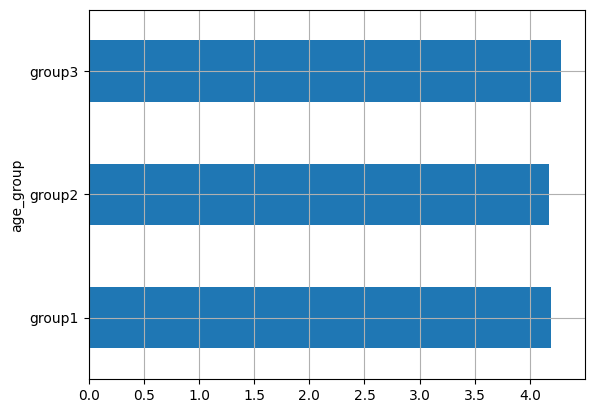

In [ ]:
df.groupby('age_group')['Rating'].mean().plot(kind = 'barh', grid = True)
plt.show()

**All of them tend to give high scores consistently.**

**Perform a Kruskal-Wallis test to determine if the median rates of each group are the same.**

In [ ]:
import scipy.stats as stats

group1 = df[df['age_group'] == 'group1']['Rating']
group2 = df[df['age_group'] == 'group2']['Rating']
group3 = df[df['age_group'] == 'group3']['Rating']

h_statistic, p_value = stats.kruskal(group1, group2, group3)


print("H-statistic:", h_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis - There are significant differences between groups.")
else:
    print("Fail to reject the null hypothesis - There are no significant differences between groups.")

H-statistic: 49.487562778640076
P-value: 1.7943711631302138e-11
Reject the null hypothesis - There are significant differences between groups.


**While it may seem that each group does not differ in rating, the rate of each group is statistically different.**

**Further examination is needed.**

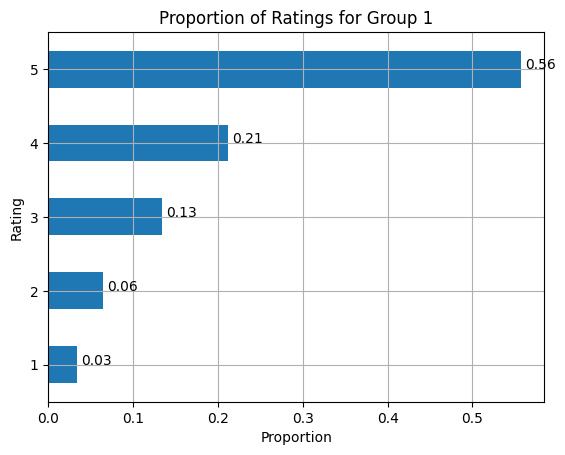

In [ ]:
group1_ratings = df[df['age_group'] == 'group1']['Rating']

normalized_value_counts_1 = group1_ratings.value_counts(normalize=True).sort_values()

ax = normalized_value_counts_1.plot(kind='barh', grid=True)

for i, v in enumerate(normalized_value_counts_1):
    ax.text(v + 0.005, i, '{:.2f}'.format(v), color='black', ha='left')


plt.xlabel('Proportion')
plt.ylabel('Rating')
plt.title('Proportion of Ratings for Group 1')
plt.show()

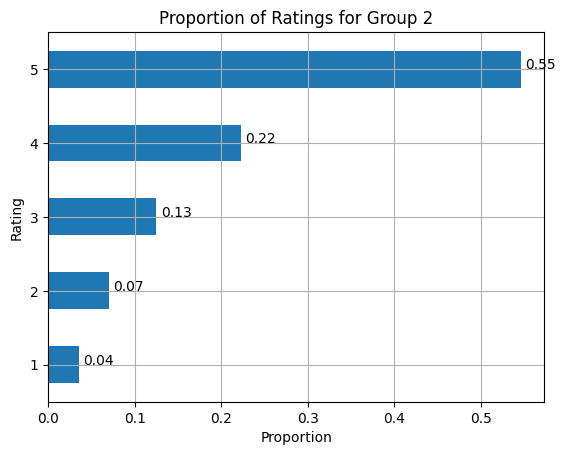

In [ ]:
group2_ratings = df[df['age_group'] == 'group2']['Rating']

normalized_value_counts_2 = group2_ratings.value_counts(normalize=True).sort_values()

ax = normalized_value_counts_2.plot(kind='barh', grid=True)

for i, v in enumerate(normalized_value_counts_2):
    ax.text(v + 0.005, i, '{:.2f}'.format(v), color='black', ha='left')


plt.xlabel('Proportion')
plt.ylabel('Rating')
plt.title('Proportion of Ratings for Group 2')
plt.show()

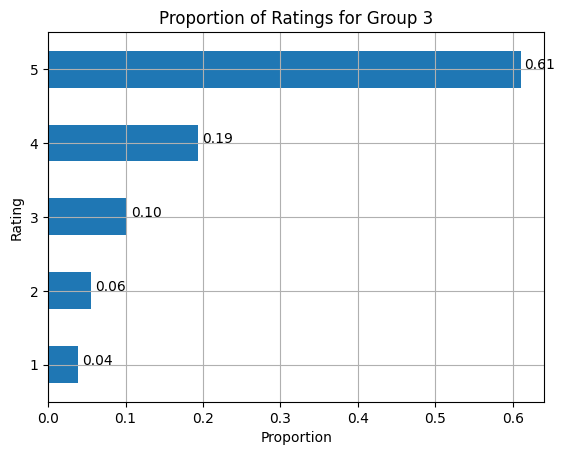

In [ ]:
group3_ratings = df[df['age_group'] == 'group3']['Rating']

normalized_value_counts_3 = group3_ratings.value_counts(normalize=True).sort_values()

ax = normalized_value_counts_3.plot(kind='barh', grid=True)

for i, v in enumerate(normalized_value_counts_3):
    ax.text(v + 0.005, i, '{:.2f}'.format(v), color='black', ha='left')


plt.xlabel('Proportion')
plt.ylabel('Rating')
plt.title('Proportion of Ratings for Group 3')
plt.show()

**It seems like Group 3 is different from the others.**

In [ ]:
import scipy.stats as stats

group1 = df[df['age_group'] == 'group1']['Rating']
group2 = df[df['age_group'] == 'group2']['Rating']
group3 = df[df['age_group'] == 'group3']['Rating']

def kruskal_wallis_test(a,b):

  h_statistic, p_value = stats.kruskal(a,b)


  print("H-statistic:", h_statistic)
  print("P-value:", p_value)

  if p_value < 0.05:
    print("Reject the null hypothesis - There are significant differences between groups.")
  else:
    print("Fail to reject the null hypothesis - There are no significant differences between groups.")

In [ ]:
kruskal_wallis_test(group1, group2)
kruskal_wallis_test(group2, group3)
kruskal_wallis_test(group1, group3)

H-statistic: 0.8688821938462127
P-value: 0.35126495058384766
Fail to reject the null hypothesis - There are no significant differences between groups.
H-statistic: 49.37822994298423
P-value: 2.110750565681539e-12
Reject the null hypothesis - There are significant differences between groups.
H-statistic: 20.625050122719383
P-value: 5.586040791061428e-06
Reject the null hypothesis - There are significant differences between groups.


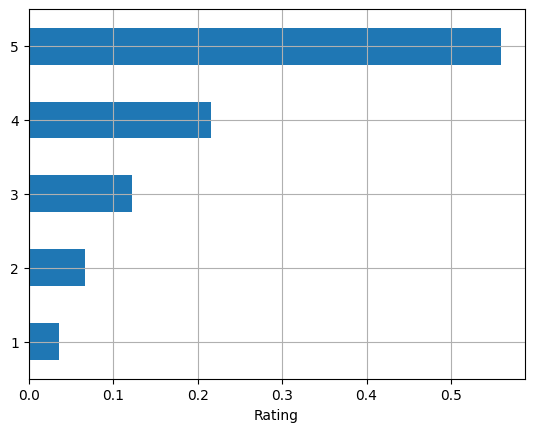

In [ ]:
df['Rating'].value_counts(normalize=True).sort_values().plot(kind = 'barh', grid =True)
plt.xlabel('Rating')
plt.show()

**The mean of age is 43.2, and the scores are mostly rated on a scale of 5.**

**Check total clothing.**

In [ ]:
df['Clothing ID'].nunique()

1206

**Check the length histrogram.**

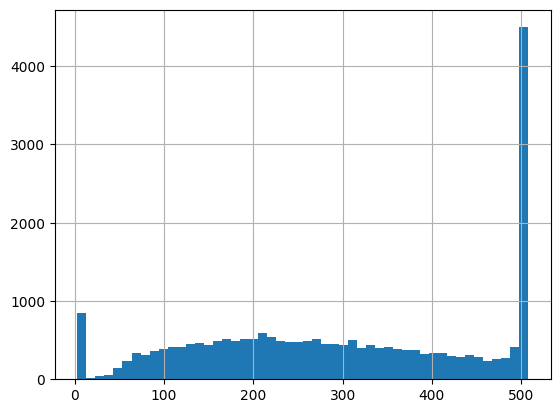

In [ ]:
(df['Review Text'].astype(str).apply(len)).hist(bins = 50)
plt.show()

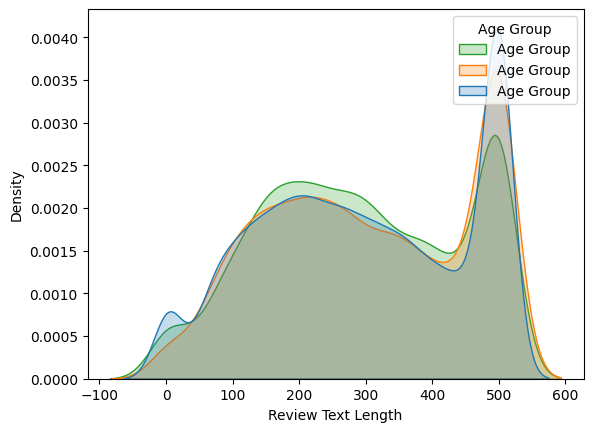

In [ ]:
import seaborn as sns

df['Review Text Length'] = df['Review Text'].astype(str).apply(len)

sns.kdeplot(data=df, x='Review Text Length', hue='age_group', fill=True, common_norm=False, label='Age Group')

plt.legend(title='Age Group')

plt.show()

**Almost the same in subgroup.**

**Examine texts that are close to zero.**

In [ ]:
df[df['Review Text'].astype(str).apply(len) <= 12].sort_values('Review Text')

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,age_group,Review Text Length
7236,877,41,NaN,Comfy cozy!,4,1,0,General,Tops,Knits,group2,11
7785,820,50,Another beautiful white top,Great fit,5,1,0,General Petite,Tops,Blouses,group2,9
859,886,27,NaN,Great style!,5,1,1,General Petite,Tops,Knits,group1,12
8742,952,48,Beautiful unique sweater,I love birds,4,1,0,General,Tops,Sweaters,group2,12
92,861,23,NaN,NaN,5,1,0,General Petite,Tops,Knits,group1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
23258,862,35,NaN,NaN,4,1,0,General,Tops,Knits,group2,3
23301,862,52,NaN,NaN,5,1,0,General,Tops,Knits,group2,3
23303,823,46,NaN,NaN,5,1,0,General,Tops,Blouses,group2,3
23470,1104,39,NaN,NaN,5,1,0,General Petite,Dresses,Dresses,group2,3


**Found NaN.**

**From what I see 'I love birds' the shortest string, but it could be reviews that have a length of 3 as NaN.**

In [ ]:
df_nan = df[df['Review Text'].astype(str).apply(len)  <= 5]
df_nan

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,age_group,Review Text Length
92,861,23,NaN,NaN,5,1,0,General Petite,Tops,Knits,group1,3
93,1081,31,NaN,NaN,5,1,0,General,Dresses,Dresses,group2,3
98,1133,50,NaN,NaN,5,1,0,General,Jackets,Outerwear,group2,3
135,861,35,NaN,NaN,4,1,0,General Petite,Tops,Knits,group2,3
142,1126,35,NaN,NaN,5,1,0,General,Jackets,Outerwear,group2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
23258,862,35,NaN,NaN,4,1,0,General,Tops,Knits,group2,3
23301,862,52,NaN,NaN,5,1,0,General,Tops,Knits,group2,3
23303,823,46,NaN,NaN,5,1,0,General,Tops,Blouses,group2,3
23470,1104,39,NaN,NaN,5,1,0,General Petite,Dresses,Dresses,group2,3


In [ ]:
(df_nan['Review Text'].astype(str).str.lower() == 'nan').sum()

845

**With 845 occurrences matching 'df_check', all entries with a length of 3 are NaN.**

**I need to consider that NaN data happens due to the randomness, or some people may choose not to review simply because they do not like it.**

**So I'll check if NaN data statistically differs from other data.**

In [ ]:
nan = df[df['Review Text'].astype(str).apply(len)  <= 5]
non_nan = df[~(df['Review Text'].astype(str).apply(len)  <= 5)]

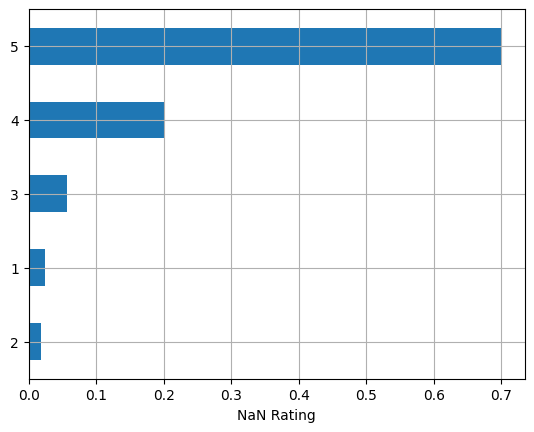

In [ ]:
nan['Rating'].value_counts(normalize =True).sort_values().plot(kind = 'barh', grid = True)
plt.xlabel('NaN Rating')
plt.show()

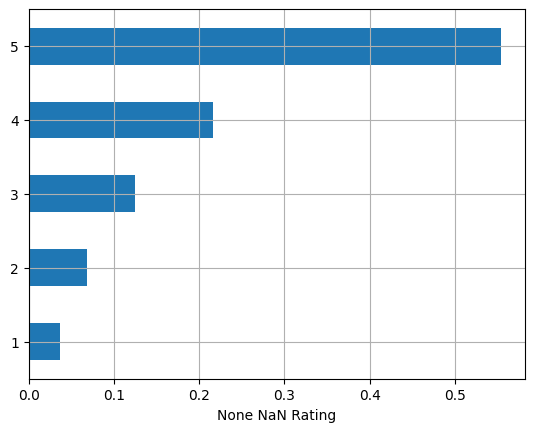

In [ ]:
non_nan['Rating'].value_counts(normalize =True).sort_values().plot(kind = 'barh', grid = True)
plt.xlabel('None NaN Rating')
plt.show()

**The histogram looks almost the same.**

**Need to perform statistical testing.**

In [ ]:
from scipy.stats import mannwhitneyu


u_stat, p_value = mannwhitneyu(nan['Rating'], non_nan['Rating'])


print(f'U-statistic: {u_stat}\nP-value: {p_value}')

U-statistic: 11183264.5
P-value: 1.8558864353171067e-20


**Reject the null hypothesis that the distributions are the same, indicating a statistically significant difference.**

**Perform a chi-square contingency test to examine each of ratings, adjusting for Bonferroni correction.**

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency


group1 = nan['Rating']
group2 = non_nan['Rating']

ratings_to_test = [1, 2, 3, 4, 5]

alpha = 0.05
alpha_adjusted = alpha / len(ratings_to_test)

for i in ratings_to_test:

    count_group1 = group1[group1 == i].count()
    count_group2 = group2[group2 == i].count()

    observed_table = [
        [count_group1, len(group1) - count_group1],
        [count_group2, len(group2) - count_group2]]

    chi2_stat, p_value, dof, expected = chi2_contingency(observed_table)

    if p_value <= alpha_adjusted:
        print(f'Rating {i}: Significant (Adjusted P-value: {p_value})')
    else:
        print(f'Rating {i}: Not Significant (Adjusted P-value: {p_value})')

Rating 1: Not Significant (Adjusted P-value: 0.09745814512989673)
Rating 2: Significant (Adjusted P-value: 2.237737796566174e-08)
Rating 3: Significant (Adjusted P-value: 4.600399471624441e-09)
Rating 4: Not Significant (Adjusted P-value: 0.26247827041048344)
Rating 5: Significant (Adjusted P-value: 7.985178688101496e-17)


**It is not random, can't drop NaN values as it would introduce bias. Instead, we will replace them with '-' and create a new column for it.**

In [ ]:
df['cleaned_text'] = df['Review Text'].astype(str).replace('nan', '-')

In [ ]:
(df['cleaned_text'].astype(str) == '-').sum()

845

In [ ]:
df['is_nan'] = df['cleaned_text'].map(lambda x: 1 if x == '-' else 0)

In [ ]:
df['is_nan'].sum()

845

**Now examine the text of reviews.**

**Can't perform normal do normal preprocess, because it might change the result.**


**For example, 'great!!!' and 'great' have different meaning.**

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
sid = SentimentIntensityAnalyzer()
print(sid.polarity_scores('GREAT!!!'))
print(sid.polarity_scores('great'))
#lowercase
print(sid.polarity_scores('really funny'))
print(sid.polarity_scores('REALLY FUNNY'))

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.7163}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'compound': 0.4927}
{'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'compound': 0.4927}


**Use VADER to convert sentences into polarity scores. VADER being choose because it is effective for analyzing sentiment in social media, which is similar to reviews.**

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

def analyze_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    text = str(text)
    sentiment_score = sid.polarity_scores(text)['compound']
    return sentiment_score

df['sentiment_VADER'] = df['cleaned_text'].apply(analyze_sentiment)

**I will also use a BERT-based model for sentiment analysis, chosen for its ability to handle long sentences, specifically the memory-efficient DistilBERT, and use the 'pipeline' from the Hugging Face Transformers library for tokenization.**

In [ ]:
from transformers import pipeline

sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", revision = 'af0f99b')

In [ ]:
def analyze_sentiment_bert(text):
    result = sentiment_analyzer(text)
    print(text[0])
    return result[0]['score'] if result[0]['label'] == 'POSITIVE' else -result[0]['score']

df['sentiment_BERT'] = df['cleaned_text'].apply(analyze_sentiment_bert)

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
I
-
I
I
I
T
T
I
I
T
I
T
T
P
-
I
I
T
I
S
D
I
T
I
I
P
I
F
T
I
T
R
T
I
T
I
I
T
L
L
T
I
T
I
L
I
V
I
I
I
I
I
F
L
V
I
I
I
L
I
S
T
I
I
D
I
T
B
T
-
T
-
I
L
I
I
I
T
I
T
I
L
F
J
G
L
I
I
I
I
I
S
I
T
I
T
I
I
T
O
T
I
A
T
G
L
L
I
I
I
I
T
W
L
I
I
I
Y
T
I
-
I
I
W
T
T
T
L
T
I
T
T
I
T
T
-
F
I
I
J
T
T
I
T
T
A
I
I
T
T
T
T
I
T
I
T
I
T
T
I
I
T
G
I
I
I
I
T
I
L
I
I
I
T
I
T
I
I
S
I
T
C
N
T
I
T
T
T
I
I
T
F
I
I
I
S
T
I
L
T
I
G
L
T
B
T
V
I
T
T
T
T
I
T
T
C
G
I
I
T
L
L
I
I
I
I
T
I
G
T
B
T
T
S
I
T
R
T
I
I
T
N
T
I
I
I
F
I
I
T
I
-
T
T
Q
I
T
S
S
I
I
-
T
T
T
I
T
I
I
T
T
T
T
-
T
I
A
I
I
I
I
I
D
I
I
I
I
I
I
T
I
I
I
T
I
I
I
T
L
I
I
B
T
L
I
I
L
B
-
I
I
M
R
I
P
P
P
I
-
I
-
T
I
I
J
R
A
T
I
I
F
T
T
T
T
I
I
I
T
I
T
I
I
F
I
T
I
I
I
S
T
S
I
T
-
I
T
T
T
R
-
T
T
I
W
T
I
I
T
T
T
T
I
T
I
-
T
S
T
T
T
B
T
I
L
-
A
C
I
L
I
T
S
T
T
I
T
T
V
I
L
G
I
L
I
G
T
T
T
I
T
S
I
T
I
S
T
I
I
I
L
T
I
T
S
I
T
I
L
S
I
T
I
C
T
I
T
C
I
I
T
I
T
1
T
T
I
I
I
T
T
G
I
T
-
I
I
T
T
T
I
T
I
I
T
I
T
P
I
M
T
I

**Plot to evaluate reviews and ratings using the VADER model.**

In [ ]:
df_result = df.groupby('Clothing ID')[['Rating','sentiment_VADER', 'sentiment_BERT']].mean()

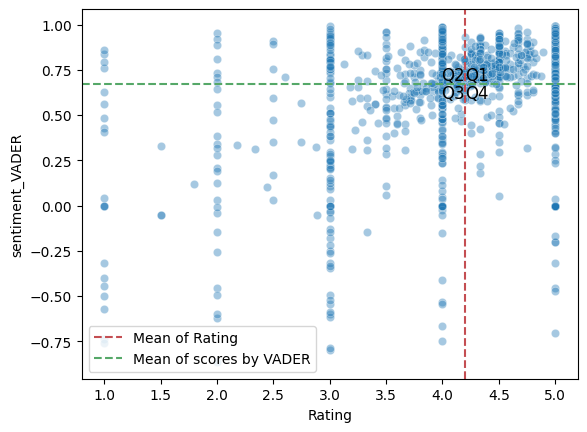

In [ ]:
import seaborn as sns

sns.scatterplot(x='Rating', y='sentiment_VADER', data=df_result, alpha = 0.4)

mean_x = df_result['Rating'].mean()
mean_y = df_result['sentiment_VADER'].mean()

plt.axvline(x=mean_x, color='r', linestyle='--', label='Mean of Rating')

plt.axhline(y=mean_y, color='g', linestyle='--', label='Mean of scores by VADER')

plt.text(mean_x, mean_y, 'Q2', fontsize=12, ha='right', va='bottom')
plt.text(mean_x, mean_y, 'Q3', fontsize=12, ha='right', va='top')
plt.text(mean_x, mean_y, 'Q4', fontsize=12, ha='left', va='top')
plt.text(mean_x, mean_y, 'Q1', fontsize=12, ha='left', va='bottom')

plt.legend()
plt.show()

**Q1 is the best, its values are higher than the average on both VADER and rating.**

**Plot to evaluate reviews and ratings using the DistilBERT model.**

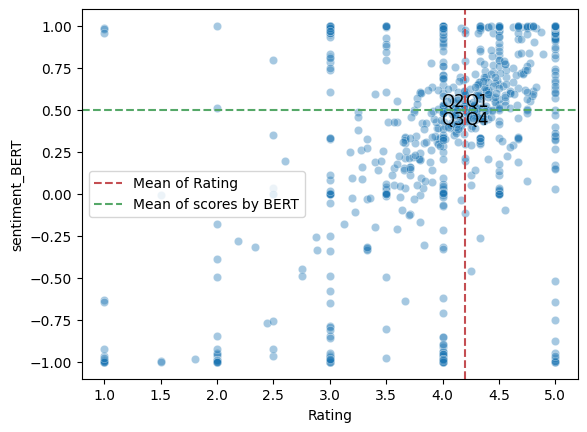

In [ ]:
import seaborn as sns

sns.scatterplot(x='Rating', y='sentiment_BERT', data=df_result, alpha = 0.4)

mean_x = df_result['Rating'].mean()
mean_y = df_result['sentiment_BERT'].mean()

plt.axvline(x=mean_x, color='r', linestyle='--', label='Mean of Rating')

plt.axhline(y=mean_y, color='g', linestyle='--', label='Mean of scores by BERT')

plt.text(mean_x, mean_y, 'Q2', fontsize=12, ha='right', va='bottom')
plt.text(mean_x, mean_y, 'Q3', fontsize=12, ha='right', va='top')
plt.text(mean_x, mean_y, 'Q4', fontsize=12, ha='left', va='top')
plt.text(mean_x, mean_y, 'Q1', fontsize=12, ha='left', va='bottom')

plt.legend()
plt.show()

**Q1 is the best, its values are higher than the average on both BERT and rating.**

**Evaluate reviews by both model.**

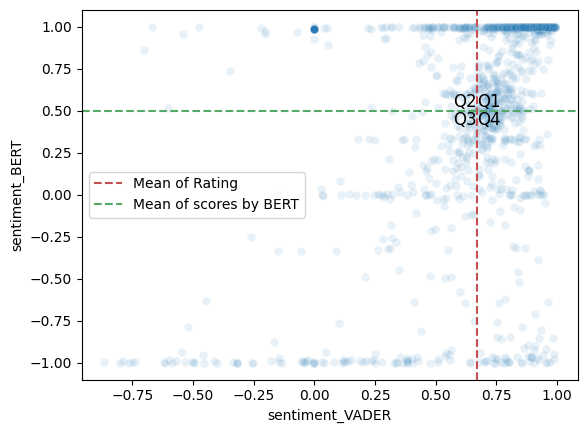

In [ ]:
import seaborn as sns

sns.scatterplot(x='sentiment_VADER', y='sentiment_BERT', data=df_result, alpha = 0.1)

mean_x = df_result['sentiment_VADER'].mean()
mean_y = df_result['sentiment_BERT'].mean()

plt.axvline(x=mean_x, color='r', linestyle='--', label='Mean of Rating')

plt.axhline(y=mean_y, color='g', linestyle='--', label='Mean of scores by BERT')

plt.text(mean_x, mean_y, 'Q2', fontsize=12, ha='right', va='bottom')
plt.text(mean_x, mean_y, 'Q3', fontsize=12, ha='right', va='top')
plt.text(mean_x, mean_y, 'Q4', fontsize=12, ha='left', va='top')
plt.text(mean_x, mean_y, 'Q1', fontsize=12, ha='left', va='bottom')

plt.legend()
plt.show()

**Q1 is the best, its values are higher than the average on both VADER and BERT.**

**Groups of the best clothing based on evaluations from both the rating and the models.**

In [ ]:
best_rating = (df_result['Rating'] >= df_result['Rating'].mean())
best_VADER = (df_result['sentiment_VADER'] >= df_result['sentiment_VADER'].mean())
best_BERT = (df_result['sentiment_BERT'] >= df_result['sentiment_BERT'].mean())

df_best = df_result[best_rating & best_VADER & best_BERT]
df_best

,Rating,sentiment_VADER,sentiment_BERT
Clothing ID,,,
3,5.000000,0.840200,0.999872
4,5.000000,0.879600,0.999178
5,5.000000,0.912300,0.999625
7,5.000000,0.867400,0.999875
12,5.000000,0.956500,0.998156
...,...,...,...
1196,5.000000,0.902900,0.995985
1197,5.000000,0.938533,0.996514
1202,4.333333,0.812167,0.984862


**Seeing some comments.**

In [ ]:
df.iloc[df_best.index,:]['Review Text']

3       I love, love, love this jumpsuit. it's fun, fl...
4       This shirt is very flattering to all due to th...
5       I love tracy reese dresses, but this one is no...
7       I ordered this in carbon for store pick up, an...
12      More and more i find myself reliant on the rev...
                              ...                        
1196    I am 5'-7" and 135 lbs, i bought a medium peti...
1197    This is one of those dresses that is just "nic...
1202    I was worried at first that the metal leaves w...
1204    I'd been eyeing this for months, loving the lo...
1205    I really wanted to love this dress. i bought i...
Name: Review Text, Length: 469, dtype: object

In [ ]:
df.iloc[df_best.index,:]['Review Text'][3]

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"